In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys

In [2]:
root_dir = abspath(join(pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness-no")
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-no")

In [7]:
name = "Effective-Volume-no"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Creating /home2/s20321005/Thesis-Project/Data/Effective-Volume-no dir in Data dir


In [8]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.36)_(0.37).hdf5'

In [9]:
name = files[2].split("/")[-1]
name

'gaia_(0.16)_(0.20).hdf5'

In [10]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,DM,compDM
0,-2.0,0.0
1,-1.8282828282828283,0.0
2,-1.6565656565656566,0.0
3,-1.4848484848484849,0.0
4,-1.3131313131313131,0.0
...,...,...
95,14.313131313131311,0.0
96,14.484848484848484,0.0
97,14.656565656565657,0.0
98,14.828282828282827,0.0


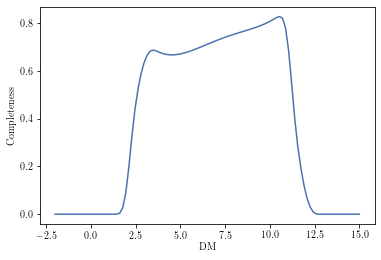

In [11]:
compDM = df_comp["compDM"].to_numpy()
DM = df_comp["DM"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

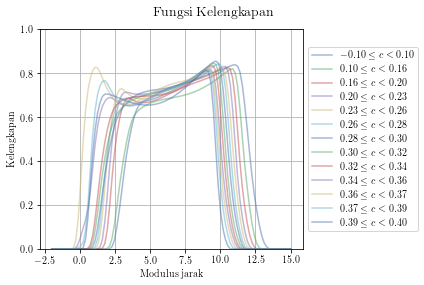

'gaia_(0.39)_(0.40).hdf5'

In [13]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(6, 4))
for file in files:
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan-no.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [15]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

compDM_interp(-20)

array(0.)

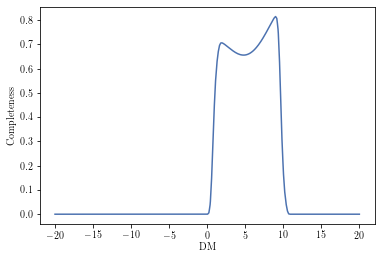

In [16]:
dms = np.linspace(-20, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [17]:
z1 = np.array([ 89. ,  96.5, 112. , 119. , 123.5, 168.5, 191. , 238.5, 262. ,
       288.5, 306. , 288.5, 286.5])

zb= 2*z1

Z = zb[0]
R = 150
zb

array([178., 193., 224., 238., 247., 337., 382., 477., 524., 577., 612.,
       577., 573.])

In [18]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [19]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        if distance>50:
            eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 419.84it/s]


(0.0, 1.0)

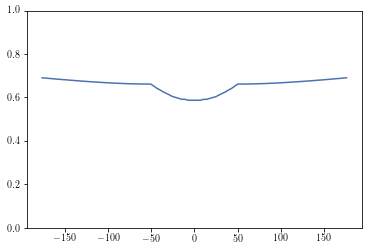

In [20]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

100%|██████████| 99/99 [00:00<00:00, 502.37it/s]


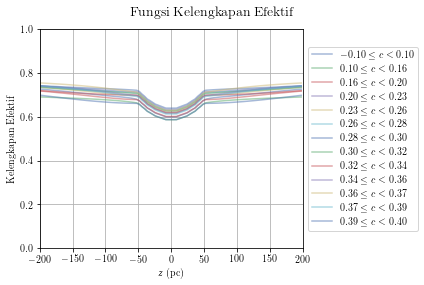

In [21]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 200
R = 150
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
for i, file in enumerate(files):
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
ax.set_xlabel(r"$z$ (pc)")
ax.set_ylabel("Kelengkapan Efektif")
ax.grid()
ax.set_ylim(0,1)
ax.set_xlim(-200, 200)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
fig.savefig(join('img', "fungsi-kelengkapan-efektif-no.pdf"), dpi=200)

In [22]:
compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

In [24]:
gaia_raw = vaex.open(join(spectral_dir, name))
gaia_raw = gaia_raw.dropna()
gaia_raw.head()

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.00625673,0.780131,9.024,8.629,AAA,385049697898909184,46.3289,-45.309,0.0139833,9.66779,0.0140114,8.24085,0.0175398,10.1019,10.4569,9.58152,4332.2,3997.99,0.903831,1.20272,-1.15786,-0.301441,120.382,120.043,120.777,0.0038,0.0005,0.0442,-0.11,-0.22,-0,G,G7,-7.57663,gaia,0.203443,0.203443,1,5536.87,gspphot,6.00928,75.7563,0,4.3426,gspphot,0.00509977,0.0409002,0,0.275,lamost,0.03,0.03,1,0.28,gspspec,0.00999999,0.00999999,0,-0.09,gspspec,0.01,0.01,0,0.091236,lamost,0.075547,0.075547,1,0.395,3.60386,121.347,-36.0274,115.875,-42.427,18.6097,0.0139844,0.0140102,10.704,-24.4033,0.0241656,-0.0525592,12.4708,0.203443,0.0646595,-4.05702,0.194402,20.7241,0.0916716,-13.509,0.179307,2.94075,4.29761
1,0.0316533,0.0947691,8.589,8.19,AAA,2742050646690373248,82.9778,-61.6011,0.021514,-55.5933,0.0191799,12.4972,0.0181939,9.66359,10.0014,9.15454,4627.12,5955.44,0.962874,1.20403,-1.34164,-0.972743,79.7145,79.546,79.8795,0.0821,0.067,0.0883,-0.06,-0.15,0.03,G,G3,-11.0349,gaia,0.171548,0.171548,1,5603.31,lamost,17.93,17.93,1,4.5109,gspphot,0.0176001,0.0103002,0,-0.26,lamost,0.01,0.01,1,-0.38,gspspec,0.02,0.00999999,0,0.15,gspspec,0.02,0.00999999,0,0.1441,lamost,0.065561,0.065561,1,0.399,4.07307,80.0178,-66.1293,45.0527,-75.5447,-34.3264,0.0213106,0.0194057,-13.0195,-28.6529,-0.0203331,-0.0424899,1.78922,0.171548,0.142234,-16.9728,0.0980382,24.0483,0.0469915,-23.0379,0.0959619,2.98703,4.31993
2,0.0507728,0.449632,9.072,8.676,AAA,2850350205563267840,32.9971,-6.54952,0.0160148,-32.3406,0.0185538,9.57336,0.0174516,10.2344,10.6121,9.69135,3732.68,4331.28,0.96153,1.20626,-1.19021,-0.632656,103.676,103.442,103.922,0.0972,0.0867,0.106,-0.06,-0.19,0.05,G,G7,-9.94892,gaia,0.18701,0.18701,1,5544.38,gspphot,18.7876,15.6792,0,4.5021,gspphot,0.0124998,0.0117002,0,0.182,lamost,0.022,0.022,1,0.02,gspspec,0.02,0.01,0,0.03,gspspec,0.01,0.03,0,0.123364,lamost,0.076107,0.076107,1,0.396,3.97732,104.457,-61.7639,84.24,-12.5964,-30.4982,0.0161141,0.0184676,-15.1004,-6.2368,-0.029006,-0.0138895,-6.29517,0.18701,0.113024,-16.9521,0.151788,-0.506512,0.0578394,-18.0559,0.141022,2.95332,4.30334
3,0.0405306,0.626528,9.151,8.752,AAA,2876882555013610752,130.048,-82.6896,0.0215605,-100.373,0.0124457,6.73893,0.0208912,10.2058,10.5349,9.70439,4948.02,4571.35,1.17405,1.20355,-1.16189,-0.457203,147.42,146.941,147.886,0.1071,0.1058,0.1084,-0.06,-0.19,0.08,G,G2,-35.2067,gaia,0.17118,0.17118,1,5788.26,gspphot,2.10352,1.97998,0,4.2127,gspphot,0.00259972,0.00270033,0,-0.084,lamost,0.019,0.019,1,-0.2522,gspphot,0.00299999,0.00320001,0,0.25,gspspec,0.04,0.04,0,0.231886,lamost,0.030648,0.030648,1,0.399,3.29396,148.391,-65.5059,133.15,-99.5242,-83.7096,0.0213227,0.0128489,-58.8793,-70.0029,-0.182754,-0.217532,-37.2902,0.17118,0.180557,-57.5823,0.173496,41.3367,0.211182,-80.6685,0.181171,2.98703,4.31993
4,0.0664056,0.376784,9.797,9.405,AAA,2800216117468695808,60.9374,60.8808,0.0215121,-2.62519,0.0220201,5.9899,0.0208832,10.9234,11.2853,10.3949,2755.71,4749.54,1.16811,1.20447,-1.18968,-0.706893,160.441,158.724,162.063,0.102,0.0881,0.1166,-0.08,-0.2,0.04,G,F9,-35.7353,gaia,0.233155,0.233155,1,5650.17,gspphot,25.625,27.2686,0,4.4505,gspphot,0.0254998,0.0226002,0,0.148,lamost,0.025,0.025,1,0.16,gspspec,0.03,0.01,0,-0.02,gspspec,0.02,0.03,0,0.056319,lamost,0.046549,0.0465

In [23]:
# for latex table
# for i, zbound in enumerate(zb):
#     name = files[i].split("/")[-1] 
#     c = regex.findall(name)
#     gaia_raw = vaex.open(join(spectral_dir, name))
#     # filter no nan in 'z'
#     gaia = gaia_raw.filter("Dist>50")
#     gaia = gaia.dropna("z")
#     gaia = gaia.extract()
#     N_d_50 = len(gaia)
#     gaia = gaia_raw.filter("abs(z)<50")
#     gaia = gaia.dropna("w")
#     gaia = gaia.extract()
#     N_z_50 = len(gaia)
#     w = gaia["w"].to_numpy()

#     dispersion = np.std(w)
#     print(f"{c[0]} < c < {c[1]} & {zbound} & {N_d_50} & {N_z_50} & {dispersion:.02f} \\\\")

-0.10 < c < 0.10 & 178.0 & 1026 & 429 & 6.33 \\
0.10 < c < 0.16 & 193.0 & 909 & 310 & 7.74 \\
0.16 < c < 0.20 & 224.0 & 1451 & 467 & 8.50 \\
0.20 < c < 0.23 & 238.0 & 2727 & 819 & 9.44 \\
0.23 < c < 0.26 & 247.0 & 4446 & 1315 & 10.75 \\
0.26 < c < 0.28 & 337.0 & 4867 & 1138 & 11.97 \\
0.28 < c < 0.30 & 382.0 & 6476 & 1445 & 12.60 \\
0.30 < c < 0.32 & 477.0 & 8820 & 1569 & 13.19 \\
0.32 < c < 0.34 & 524.0 & 10114 & 1704 & 14.24 \\
0.34 < c < 0.36 & 577.0 & 12233 & 1957 & 14.46 \\
0.36 < c < 0.37 & 612.0 & 6439 & 1024 & 14.75 \\
0.37 < c < 0.39 & 577.0 & 11803 & 1894 & 14.61 \\
0.39 < c < 0.40 & 573.0 & 5753 & 905 & 15.28 \\


In [25]:
name = files[12].split("/")[-1] 
gaia_raw = vaex.open(join(spectral_dir, name))
gaia = gaia_raw.filter("Dist>50")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.01153959341541091,-1.0330015666596515,9.678000450134277,9.281000137329102,AAA,4918240000670334976,32.44932174682617,22.40143425623171,0.01305475551635027,23.47624591229154,0.012260078452527523,6.505179098274429,0.011432905681431293,10.809146881103516,11.172587394714355,10.279581069946289,2179.1572265625,3967.986083984375,0.9897304177284241,1.2044603824615479,2.344795342837368,-0.9921726080540599,153.09869384765625,152.8070068359375,153.4228973388672,0.02459999918937683,0.019099999219179153,0.034299999475479126,-0.07999999821186066,-0.2199999988079071,0.05000000074505806,G,--,15.323904037475586,gaia,0.24891114234924316,0.24891114234924316,1.0,5503.70849609375,gspphot,10.142578125,17.52490234375,0.0,4.378300189971924,gspphot,0.005100250244140625,0.009399890899658203,0.0,nan,--,nan,nan,nan,0.1014999970793724,gspphot,0.009599998593330383,0.01990000158548355,0.0,-0.019999999552965164,gspspec,0.019999999552965164,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.3970003128051758,3.7442967396504105,153.72366923229848,-128.69992968835538,84.06720276334576,-12.96271802984981,-29.747711174967115,0.012963330268760525,0.012356708040446883,-21.675675463992537,-9.445286983380154,-0.03914472492772994,-0.01909941095414695,-24.68324361100354,0.24891114234924316,0.2094890565269798,-9.767007044634585,0.14001214758266045,0.07261995938910282,0.09881705159700781,13.586853909196584,0.10101177794286353,2.965186174771919,4.308983379292916
1,0.009009983010740406,-1.0065876141336292,10.904999732971191,10.508999824523926,AAA,4919368958593983488,64.70270538330078,63.22497959539172,0.008725921623408794,13.749250748058596,0.009079704992473125,3.514191369342543,0.010122379288077354,11.9539213180542,12.291946411132812,11.451736450195312,2385.501953125,2055.19677734375,0.9437752962112427,1.1996777057647705,2.3644552232494824,-1.0164232539856777,276.9830017089844,275.7419128417969,278.41949462890625,0.08780000358819962,0.07069999724626541,0.09809999912977219,nan,nan,nan,G,--,-45.09299850463867,galah,0.09399999678134918,0.09399999678134918,1.0,5781.63427734375,gspphot,35.81787109375,19.4736328125,0.0,4.447800159454346,gspphot,0.019299983978271484,0.016699790954589844,0.0,0.088714599609375,galah,0.04815073002239107,0.04815073002239107,1.0,0.11509999632835388,gspphot,0.03749999403953552,0.022100001573562622,0.0,-0.028630878768369217,galah,0.016470785293466985,0.016470785293466985,1.0,nan,--,nan,nan,nan,0.3959999084472656,3.634126772020969,284.56048487396015,-241.94203984648175,149.79559041115579,-53.982287619489796,-35.67005136437807,0.008772941960176606,0.009034281393203737,-48.11236090958355,-72.81221095373999,-0.13911894973911335,-0.21006396460070342,13.012602695420124,0.09399999678134918,0.1084003828514147,-64.64402491742383,0.1282163740287266,-4.9726796364497545,0.17336218107685183,97.24063183016493,0.1746764493717362,2.9533210583671714,4.303336831073077
2,0.014154079181605893,-0.8580299529527298,8.92199993133545,8.52299976348877,AAA,4977620706678230144,112.96099090576172,102.83248115987948,0.008348525501787663,46.751108573245006,0.011294216848909855,11.302182864053147,0.015336176380515099,10.038804054260254,10.396697998046875,9.50936222076416,4367.81884765625,8964.3740234375,1.179744005203247,1.2070400714874268,2.4889852608131227,-1.

21.05263157894737

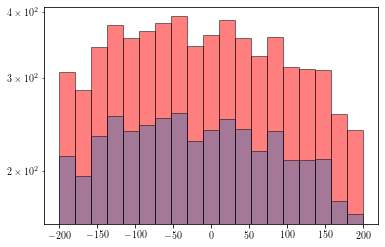

In [26]:
zedge = np.linspace(-Z, Z, 20) #edges
zmid = (zedge[:-1]+zedge[1:])/2
zs = gaia["z"].to_numpy()
dz = zedge[1]-zedge[0]
znum, _ = np.histogram(zs, bins=zedge)
zcor = znum/compz(zmid)

zs = gaia_raw["z"].to_numpy()
znum_raw, _ = np.histogram(zs, bins=zedge)

dz = zedge[1]-zedge[0]
plt.bar(zmid, zcor, width=dz, edgecolor="k", alpha=0.5, color="r")
plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
plt.yscale("log")
dz


# automate

In [27]:
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness-no/gaia_(0.36)_(0.37).hdf5'

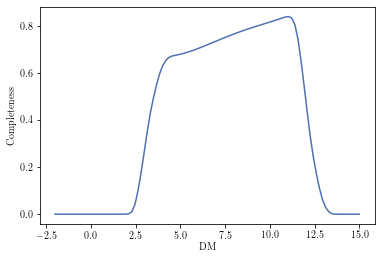

100%|██████████| 99/99 [00:00<00:00, 457.93it/s]


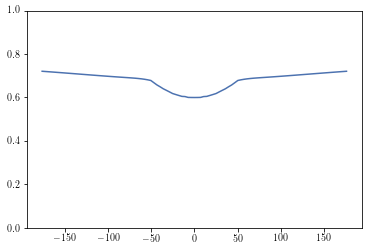

data: 2323


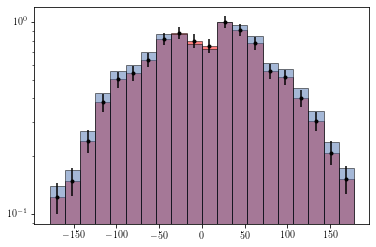

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(-0.10)_(0.10).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

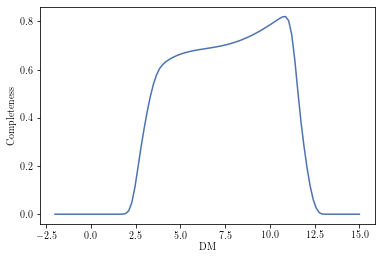

100%|██████████| 99/99 [00:00<00:00, 448.86it/s]


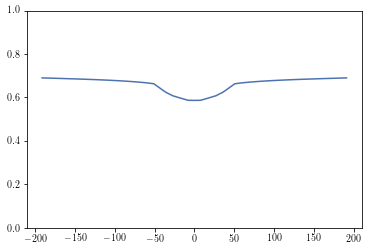

data: 2029


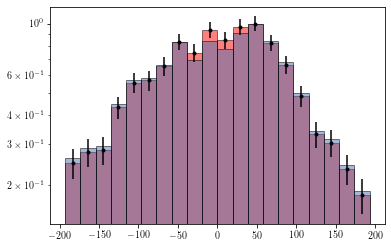

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.10)_(0.16).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

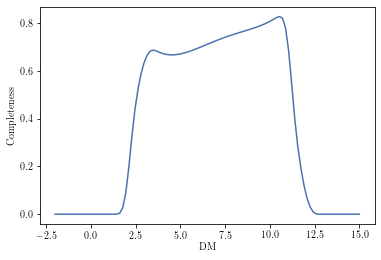

100%|██████████| 99/99 [00:00<00:00, 423.17it/s]


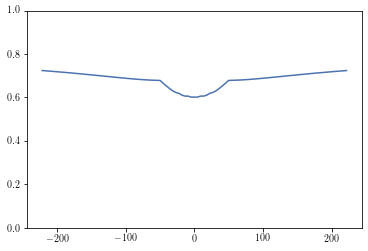

data: 2657


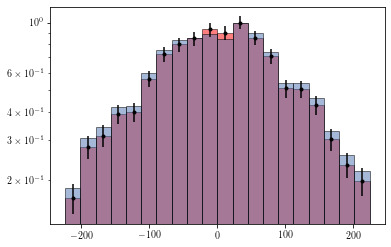

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.16)_(0.20).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

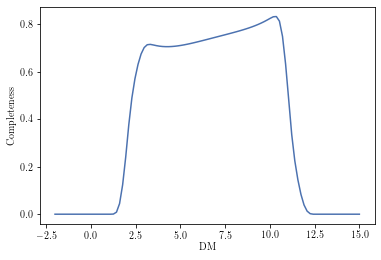

100%|██████████| 99/99 [00:00<00:00, 429.16it/s]


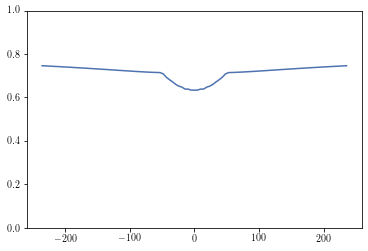

data: 3671


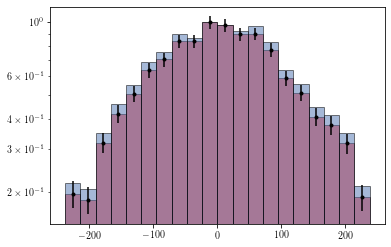

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.20)_(0.23).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

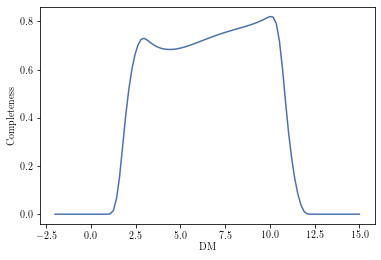

100%|██████████| 99/99 [00:00<00:00, 423.14it/s]


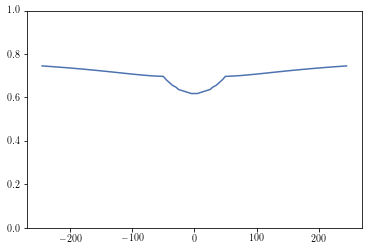

data: 5661


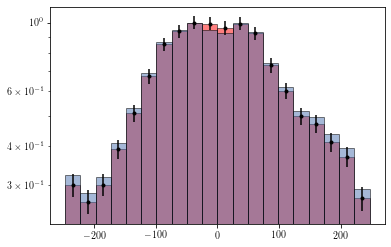

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.23)_(0.26).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

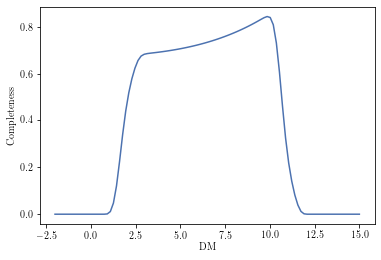

100%|██████████| 99/99 [00:00<00:00, 428.93it/s]


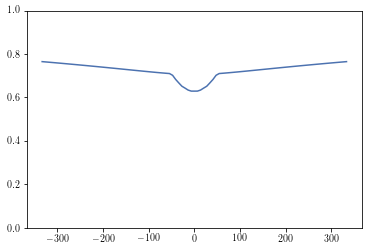

data: 6215


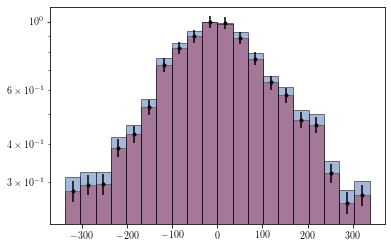

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.26)_(0.28).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

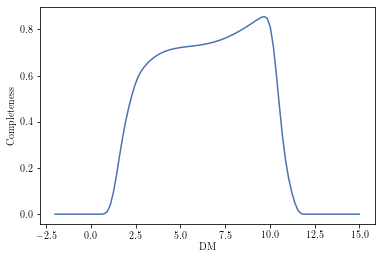

100%|██████████| 99/99 [00:00<00:00, 447.77it/s]


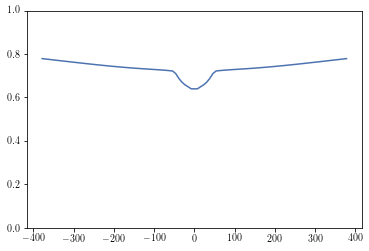

data: 8452


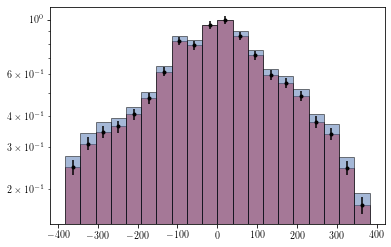

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.28)_(0.30).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

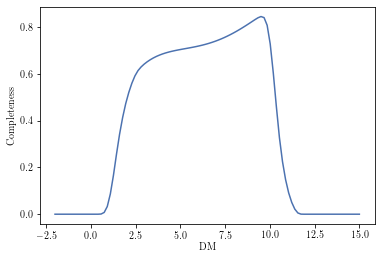

100%|██████████| 99/99 [00:00<00:00, 409.85it/s]


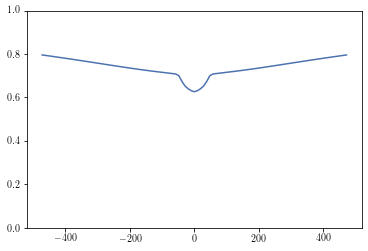

data: 11721


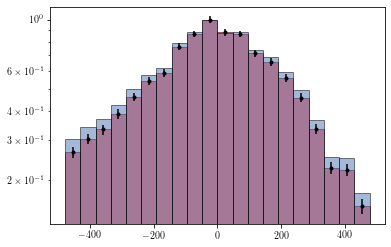

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.30)_(0.32).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

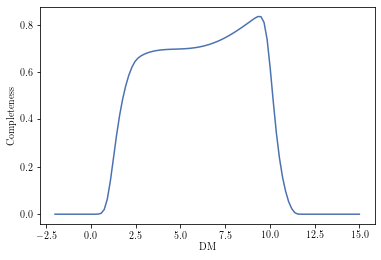

100%|██████████| 99/99 [00:00<00:00, 434.36it/s]


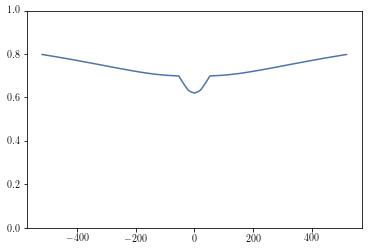

data: 13783


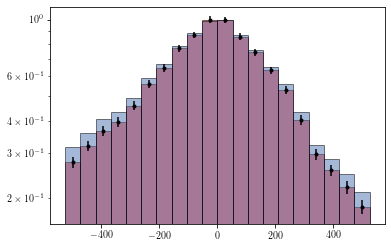

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.32)_(0.34).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

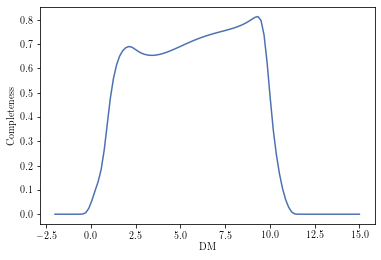

100%|██████████| 99/99 [00:00<00:00, 409.06it/s]


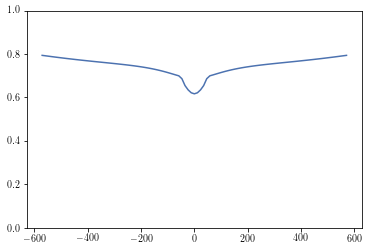

data: 17122


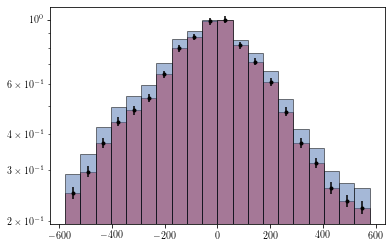

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.34)_(0.36).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

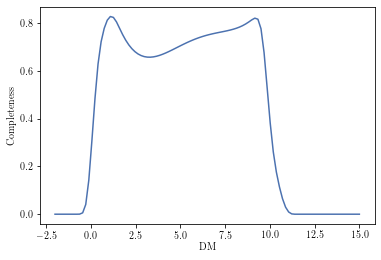

100%|██████████| 99/99 [00:00<00:00, 410.61it/s]


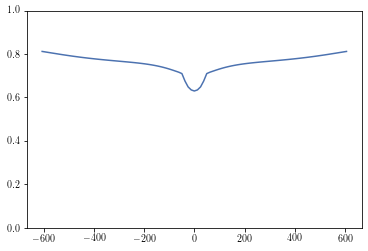

data: 9240


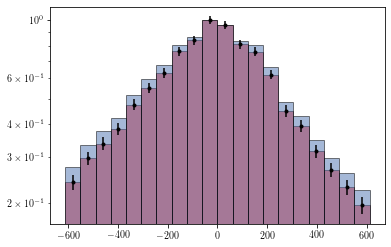

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.36)_(0.37).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

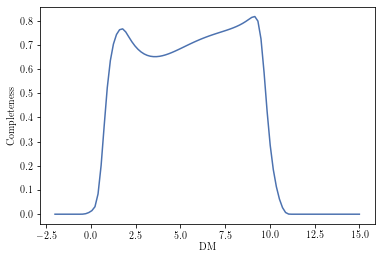

100%|██████████| 99/99 [00:00<00:00, 416.74it/s]


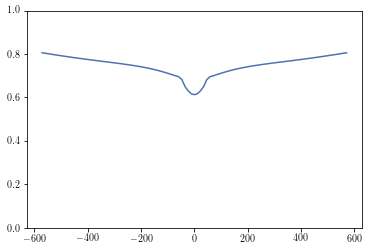

data: 16776


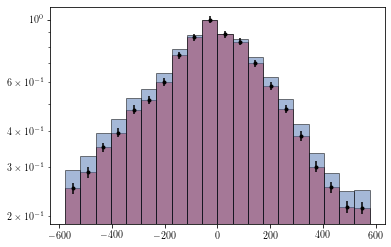

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.37)_(0.39).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

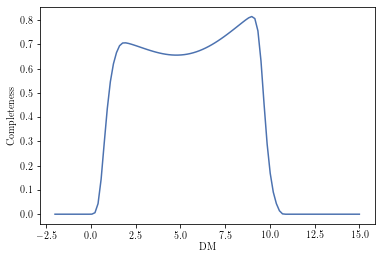

100%|██████████| 99/99 [00:00<00:00, 405.94it/s]


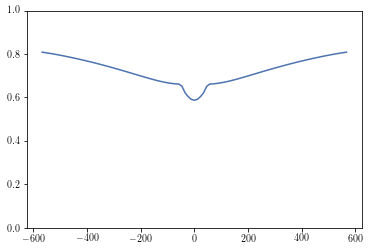

data: 7958


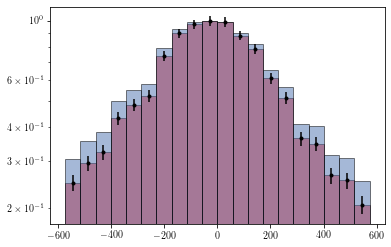

export to /home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.39)_(0.40).hdf5
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

In [32]:
R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

for file, Z in zip(files, zb):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]

    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # plot
    plt.plot(DM, compDM)
    plt.xlabel("DM")
    plt.ylabel("Completeness")
    plt.show()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()
    print(f"data: {len(gaia)}")

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    zerr = znum_cor/np.sqrt(znum)
    znum_cor_max = znum_cor.max()
    znum_cor /= znum_cor_max
    zerr /= znum_cor_max

    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)
    znum_raw_max = znum_raw.max()
    znum_raw = znum_raw/znum_raw_max


    dz = zedge[1]-zedge[0]
    plt.bar(zmid, znum_cor, width=dz, edgecolor="k", alpha=0.5, color="r")
    plt.bar(zmid, znum_raw, width=dz, edgecolor="k", alpha=0.5)
    plt.errorbar(zmid, znum_cor, yerr=zerr, fmt=".", color="k")
    plt.yscale("log")
    plt.show()
    df = vaex.from_arrays(zmid=zmid, znum=znum_cor, znum_raw=znum_raw, zerr=zerr)
    n = name.split("_")
    name = f"z_{n[1]}_{n[2]}"
    print(f"export to {join(data_dir, name)}")
    df.export(join(data_dir, name), progress=True)

# all out

 92%|█████████▏| 11/12 [00:03<00:00,  3.16it/s]


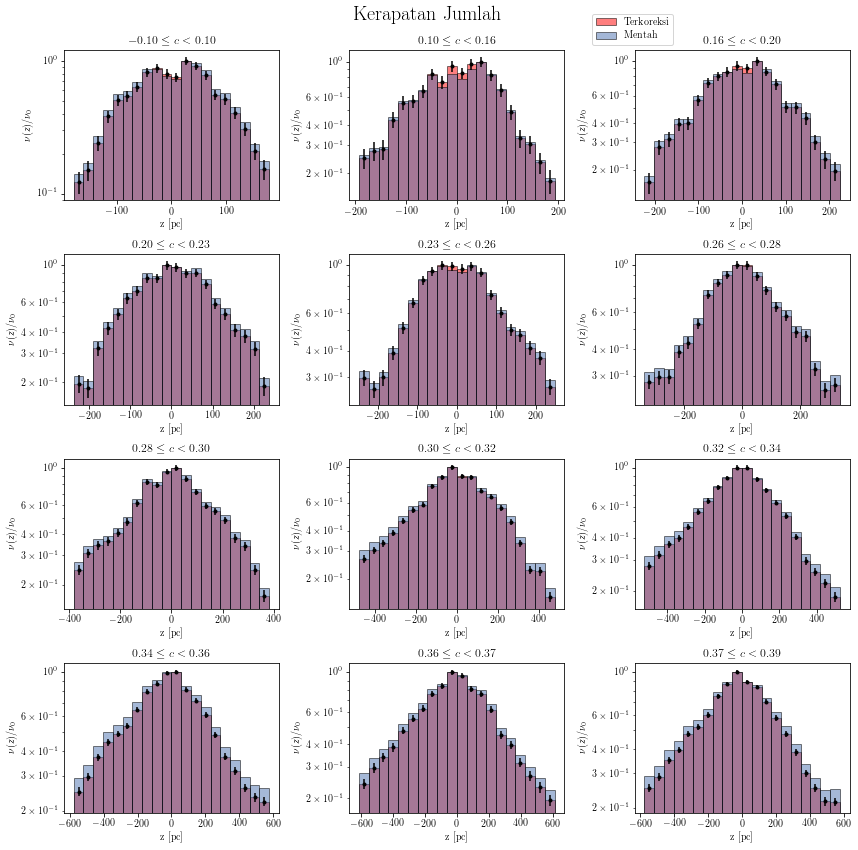

In [33]:
import re

# regex to extract the number from the file name inside ()
regex = re.compile(r"\((.*?)\)")

R = 150
er = np.linspace(0, R, 100)
r = (er[:-1]+er[1:])/2

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
for i, (file, Z, ax) in enumerate(zip(files[:-1], tqdm(zb[:-1]), axes.flatten())):
    ez = np.linspace(-Z, Z, 100) #edges
    z = (ez[:-1]+ez[1:])/2
    dz = ez[1]-ez[0]
    
    name = file.split("/")[-1]
    c = regex.findall(name)
    df_comp = vaex.open(join(comp_dir, name))

    compDM = df_comp["compDM"].to_numpy()
    DM = df_comp["DM"].to_numpy()

    # interpolate compDM, set to 0 if beyong the range
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)

    frac = []
    for zz in z:
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            if distance>50:
                eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)

    compz = interpolate.interp1d(z, frac, fill_value='interpolate', bounds_error=False)

    gaia_raw = vaex.open(join(spectral_dir, name))
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()

    zedge = np.linspace(-Z, Z, 21) #edges
    zmid = (zedge[:-1]+zedge[1:])/2
    zs = gaia["z"].to_numpy()
    vol = np.pi*(R**2)*(2*Z)
    znum, _ = np.histogram(zs, bins=zedge)
    znum_cor = znum/(compz(zmid))
    
    zerr = znum_cor/np.sqrt(znum)
    zs = gaia_raw["z"].to_numpy()
    znum_raw, _ = np.histogram(zs, bins=zedge)

    dz = zedge[1]-zedge[0]
    ax.bar(zmid, znum_cor/znum_cor.max(), width=dz, edgecolor="k", alpha=0.5, color="r")
    ax.bar(zmid, znum_raw/znum_raw.max(), width=dz, edgecolor="k", alpha=0.5)
    ax.errorbar(zmid, znum_cor/znum_cor.max(), yerr=zerr/znum_cor.max(), fmt=".", color="k")
    ax.set_yscale("log")
    ax.set_title(r"${}\leq c < {}$".format(c[0], c[1]))
    ax.set_xlabel("z [pc]")
    ax.set_ylabel(r"$\nu(z)/\nu_0$")
    if i==2:
        ax.legend(["Terkoreksi", "Mentah"], loc="lower right", bbox_to_anchor=(0.2, 1.0))
        # break
fig.tight_layout()
fig.suptitle("Kerapatan Jumlah", fontsize=20)
fig.subplots_adjust(top=0.93)
fig.savefig(join("img", "kerapatan-jumlah-no.pdf"), bbox_inches="tight")
